# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
#Carregando a base de dados em dataframe

df = pd.read_csv('demo01_transformado.csv')
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  int64  
 9   sexo_M                                  16650 non-null  int64  
 10  posse_de_veiculo_Y                      16650 non-null  in

In [7]:
# Separar as variáveis explicativas (features) e a variável resposta
y = df.mau #df ponto nome da coluna isola a coluna que é nossa target
X = df.drop('mau',axis=1) #Features, variaveis explicativas. O metodo drop retira a coluna 'mau' do df

In [8]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [9]:
X

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,0,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


Dividimos o DataFrame em duas partes:

    X: contém todas as colunas, exceto a variável resposta 'mau', que são as variáveis explicativas (features).
    y: contém apenas a coluna 'mau', que é a variável resposta / target / default

In [10]:
# Separar 70% para treinamento e 30% para validação
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar as dimensões dos conjuntos
print(f"Dimensões do conjunto de treinamento: X_treino {X_treino.shape}, y_treino {y_treino.shape}")
print(f"Dimensões do conjunto de validação: X_validacao {X_validacao.shape}, y_validacao {y_validacao.shape}")

Dimensões do conjunto de treinamento: X_treino (11655, 28), y_treino (11655,)
Dimensões do conjunto de validação: X_validacao (4995, 28), y_validacao (4995,)


A função train_test_split do scikit-learn divide o conjunto de dados em conjuntos de treinamento e validação:

X_treino: conjunto de treinamento para as variáveis explicativas.
X_validacao: conjunto de validação para as variáveis explicativas.
y_treino: conjunto de treinamento para a variável resposta.
y_validacao: conjunto de validação para a variável resposta.

O parâmetro test_size=0.3 indica que 30% dos dados serão utilizados para validação, e random_state fixa um valor para reproduzir as respostas


In [6]:
#Fim do 1

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
# 1.  Defina um objeto com a função da árvore de decisão vista em aula
clf = DecisionTreeClassifier(random_state=42)
clf

DecisionTreeClassifier(random_state=42)

In [12]:
# 2. Treine o modelo com os dados que você separou para treinamento.
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=42)

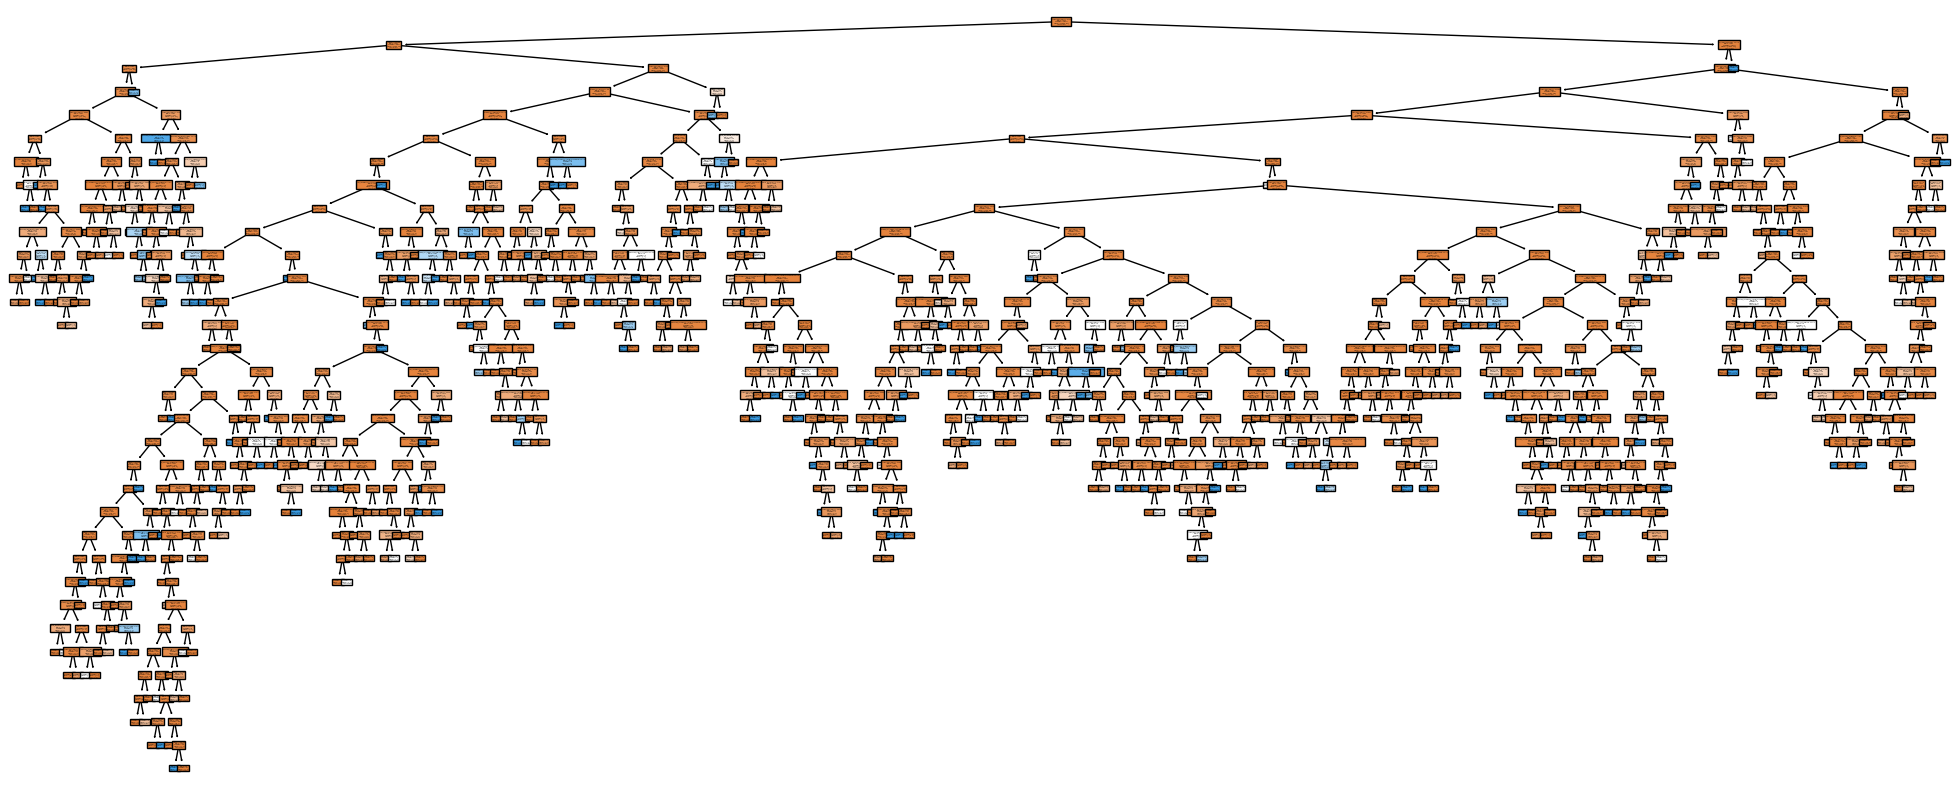

In [11]:
#3. Visualize a árvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names=['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents']);

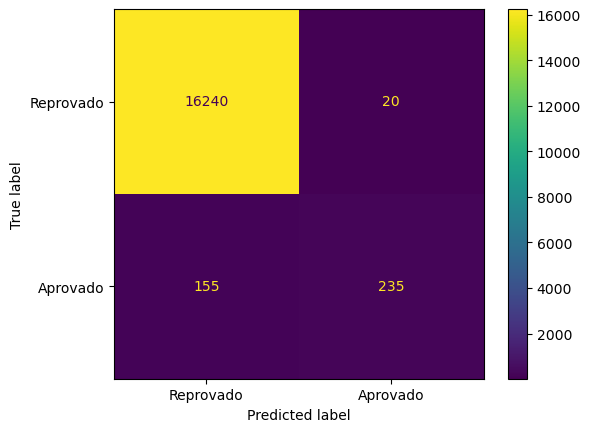

In [14]:
#4. Visualização da matriz de classificação (ou matriz de confusão)
predic = clf.predict(X)
cm = confusion_matrix(y, predic, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovado', 'Aprovado'])
disp.plot()

In [15]:
#5. Calcule a acurácia na base de treinamento

In [16]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9894894894894894

Devida a quantidade de variáveis utilziadas certamente este modelo está overfitado

In [ ]:
#Fim do 2.

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [17]:
#1. Classifique a base de teste de acordo com a árvore que você treinou no item 2

In [18]:
clf_validacao = DecisionTreeClassifier(random_state=123)
clf_validacao = clf.fit(X_treino,y_treino)

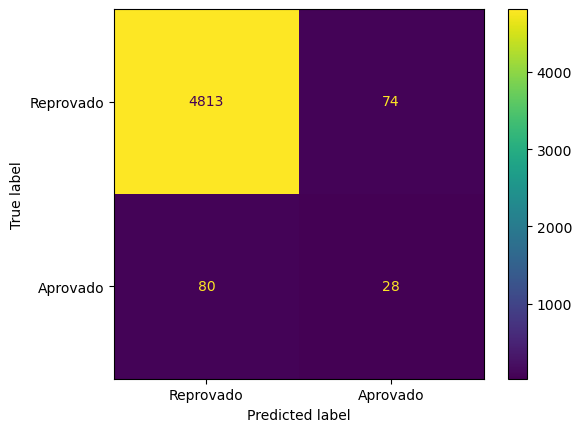

In [19]:
# 2. Visualização da matriz de confusão para a base de teste.

predic = clf_validacao.predict(X_validacao)
cm = confusion_matrix(y_validacao, predic, labels=clf_validacao.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovado', 'Aprovado'])
disp.plot()

In [21]:
#3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento

predict = clf_validacao.predict(X_validacao)
accuracy_score(y_validacao, predict)

0.9691691691691692

In [22]:
#4. Nova árvore com número mín. de observações por folha de 5 e máximo de profundidade de 10. random_state = 123

nova_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
nova_clf = nova_clf.fit(X_treino,y_treino)
predict = nova_clf.predict(X_validacao)
accuracy_score(y_validacao, predict)

0.9751751751751752

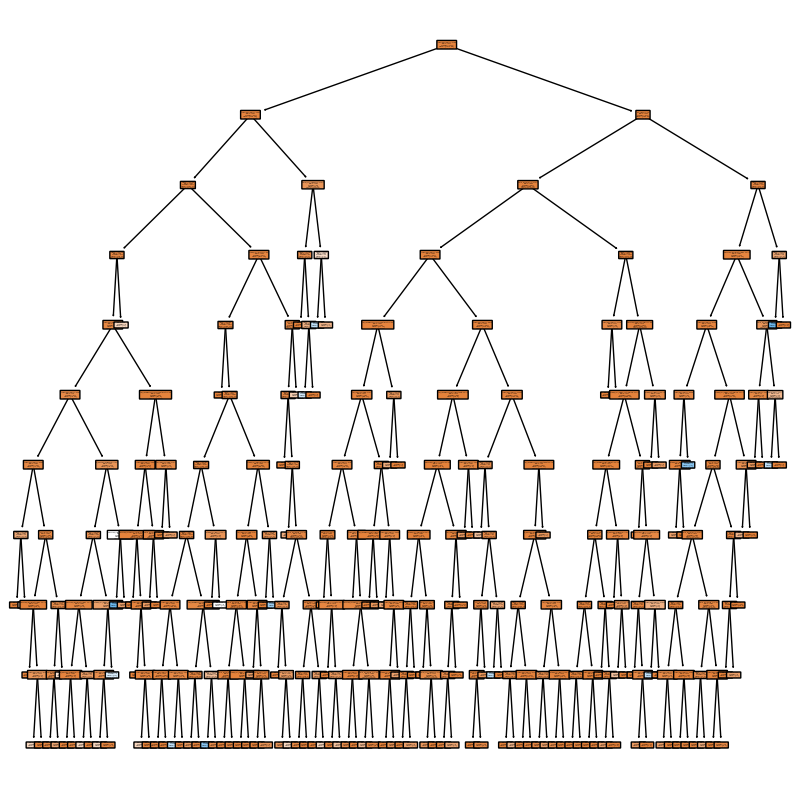

In [23]:
plt.figure(figsize=[10,10])
plot_tree(nova_clf,
         filled=True,
         rounded=True,
         class_names=['Reprovado', 'Aprovado'],
         feature_names=['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents']);

In [ ]:
# Avalie a matriz de classificação. Observe a distribuição da predição:
# qual a proporção de proponentes foram classificados como 'maus'?

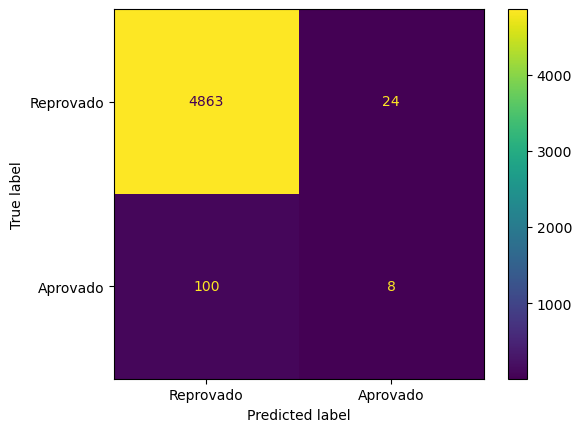

In [24]:
predic = nova_clf.predict(X_validacao)
cm = confusion_matrix(y_validacao, predic, labels=clf_validacao.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovado', 'Aprovado'])
disp.plot()

In [25]:
# Avaliar a matriz de confusão
matriz_confusao = confusion_matrix(y_validacao, predic)
print("Matriz de Confusão:")
print(matriz_confusao)

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = matriz_confusao[1, 0] / (matriz_confusao[1, 0] + matriz_confusao[1, 1])
print(f"A proporção de proponentes classificados como 'maus' é: {proporcao_maus:.2%}")

Matriz de Confusão:
[[4863   24]
 [ 100    8]]
A proporção de proponentes classificados como 'maus' é: 92.59%


In [26]:
# 5.  Como ficaria a acurácia se você classificasse todos os contratos como 'bons'? Ficaria errado.
matriz_confusao = [[4863, 24], [100, 8]]

# Extrair os valores da matriz de confusão
verdadeiros_negativos, falsos_positivos, falsos_negativos, verdadeiros_positivos = matriz_confusao[0][0], matriz_confusao[0][1], matriz_confusao[1][0], matriz_confusao[1][1]

# Calcular a acurácia considerando que todos os contratos são classificados como 'bons'
total_contratos = verdadeiros_negativos + falsos_positivos + falsos_negativos + verdadeiros_positivos

# Se todos os contratos são classificados como 'bons'
y_true = [0] * total_contratos  # 0 representa 'bom'
y_pred = [0] * total_contratos  # 0 representa 'bom'

# Calcular a acurácia
acuracia = accuracy_score(y_true, y_pred)

# Exibir a acurácia
print(f"A Acurácia ao classificar todos os contratos como 'bons' é: {acuracia:.2%}")

A Acurácia ao classificar todos os contratos como 'bons' é: 100.00%


In [27]:
#Fim do 3.